# Gaussian fit
Generate a sample from a Gaussian distribution, and retrieve the parameters

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tabulate import tabulate

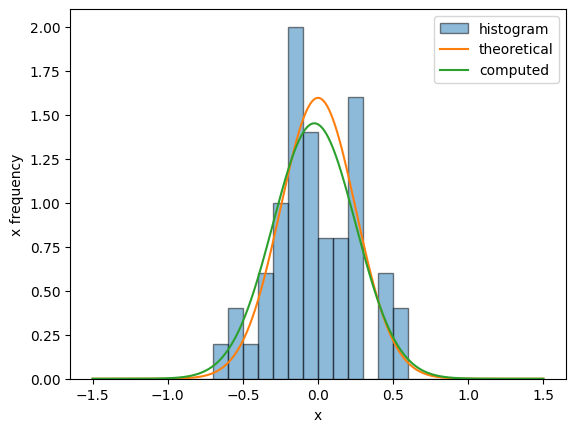

╒═══════╤════════╤══════════╕
│       │   true │     calc │
╞═══════╪════════╪══════════╡
│ mean  │   0    │ -0.02478 │
├───────┼────────┼──────────┤
│ sigma │   0.25 │  0.27489 │
╘═══════╧════════╧══════════╛


In [22]:
#np.random.seed(42)

def gaussian(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2)) * 1.0/np.sqrt(2.0*np.pi*sigma**2)

n = 50
mean = 0.0
sigma = 0.25
samples = np.random.normal(mean,sigma,n)

width = 0.1
my_bins = np.arange(-1.5,1.5,width)
x = np.linspace(-1.5,1.5,1000)
distrib = gaussian(x,mean,sigma)

mean_calc = np.average(samples)
sigma_calc = np.std(samples)
distrib_calc = gaussian(x,mean_calc,sigma_calc)

plt.hist(samples,bins=my_bins,alpha=0.5,edgecolor='black',label='histogram',density=True)
plt.plot(x,distrib,label='theoretical')
plt.plot(x,distrib_calc,label='computed')
plt.xlabel('x')
plt.ylabel('x frequency')
plt.legend()


plt.show()

#make a table to print
index = ['mean', 'sigma']
columns = ['true', 'calc']
data = [[mean,f'{mean_calc:.5f}'],
        [sigma,f'{sigma_calc:.5f}']]
table = tabulate(data, headers=columns, showindex=index, tablefmt='fancy_grid')
print(table)

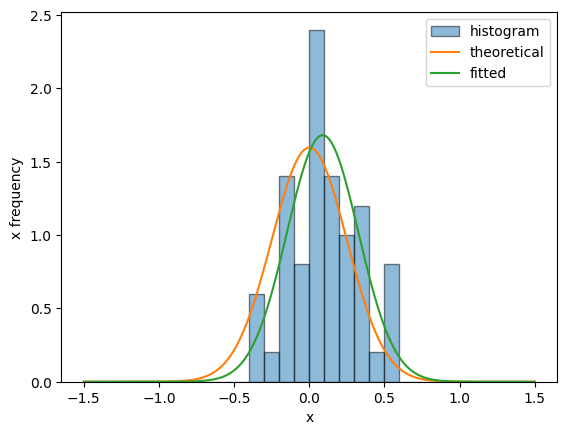

╒═══════╤════════╤════════════════════╕
│       │   true │ fit                │
╞═══════╪════════╪════════════════════╡
│ mean  │   0    │ 0.08919 +- 0.02658 │
├───────┼────────┼────────────────────┤
│ sigma │   0.25 │ 0.23738 +- 0.02170 │
╘═══════╧════════╧════════════════════╛


In [21]:
#np.random.seed(42)

def gaussian(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2)) * 1.0/np.sqrt(2.0*np.pi*sigma**2)

n = 50
mean = 0.0
sigma = 0.25
samples = np.random.normal(mean,sigma,n)

width = 0.1
my_bins = np.arange(-1.5,1.5,width)
x = np.linspace(-1.5,1.5,1000)
distrib = gaussian(x,mean,sigma)

y_hist, x_edges = np.histogram(samples, bins=my_bins)
x_center = (x_edges[:-1] + x_edges[1:]) / 2

params,pcov = optimize.curve_fit(gaussian,x_center,y_hist/(n*width),p0=[mean,sigma])

mean_fit = params[0]
sigma_fit = params[1]
param_err = np.sqrt(np.diag(pcov)) #extract the diagonal, and apply square root
distrib_fit = gaussian(x,mean_fit,sigma_fit)

plt.hist(samples,bins=my_bins,alpha=0.5,edgecolor='black',label='histogram',density=True)
plt.plot(x,distrib,label='theoretical')
plt.plot(x,distrib_fit,label='fitted')
plt.xlabel('x')
plt.ylabel('x frequency')
plt.legend()


plt.show()

#make a table to print
index = ['mean', 'sigma']
columns = ['true', 'fit']
data = [[mean,f'{params[0]:.5f} +- {param_err[0]:.5f}'],
        [sigma,f'{params[1]:.5f} +- {param_err[1]:.5f}']]
table = tabulate(data, headers=columns, showindex=index, tablefmt='fancy_grid')
print(table)